<a href="https://colab.research.google.com/github/alirezash97/BRATS2015/blob/master/BraTS2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !wget 'https://www.cbica.upenn.edu/MICCAI_BraTS2020_TrainingData'

In [0]:
# !unzip /content/MICCAI_BraTS2020_TrainingData -d '/content/drive/My Drive/BRATS2020/'

In [0]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt


In [0]:
import glob, os
images_path = glob.glob('/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/**/*.nii.gz', recursive=True)

In [0]:
X_trainset_filenames = []
y_trainset_filenames = []

for item in images_path:
  if 'seg' in item:
    y_trainset_filenames.append(os.path.join(data_path, item))
  else:
    X_trainset_filenames.append(os.path.join(data_path, item))




In [73]:
print(len(X_trainset_filenames))
print(len(y_trainset_filenames))

1476
369


In [0]:
X_trainset_nibfile = []
y_trainset_nibfile = []

for item in X_trainset_filenames:
  X_trainset_nibfile.append(nib.load(item))

for item in y_trainset_filenames:
  y_trainset_nibfile.append(nib.load(item))



In [77]:
print(len(X_trainset_nibfile))
print(len(y_trainset_nibfile))

1476
369


In [80]:
print(X_trainset_nibfile[1].shape)
print(y_trainset_nibfile[1].shape)

(240, 240, 155)
(240, 240, 155)


In [0]:
# example_filename = os.path.join(data_path, '/content/drive/My Drive/BRATS2020/MICCAI_BraTS2020_TrainingData/BraTS20_Training_001/BraTS20_Training_001_t1ce.nii.gz')

In [0]:
# img = nib.load(example_filename)

In [0]:
# image =  img.get_fdata()

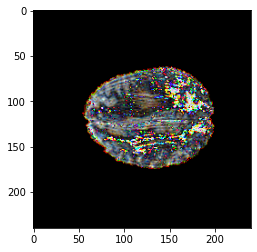

In [58]:
# plt.imshow((image[:, :, 106:109] * 255).astype(np.uint8))